In [2]:
!git clone https://github.com/fjorka/Pitt_SBII_2023.git

Cloning into 'Pitt_SBII_2023'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), 13.06 MiB | 5.89 MiB/s, done.


In [7]:
!pip install cellpose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.4/170.4 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 46.6 MB/s eta 0:00:00


In [42]:
from tifffile import imread, imsave
import matplotlib.pyplot as plt
from cellpose import models

In [2]:
im_path = './Pitt_SBII_2023/2187T-5_2.0.4_P0007_Z00_DAPI.tif'

In [3]:
im = imread(im_path)

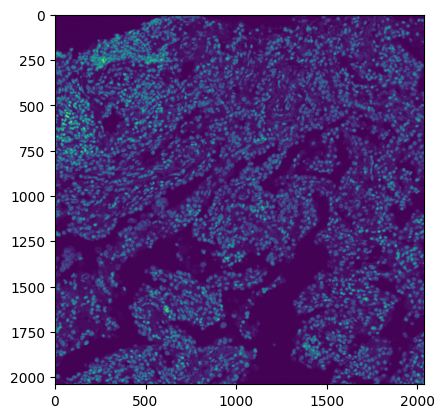

In [4]:
plt.imshow(im)

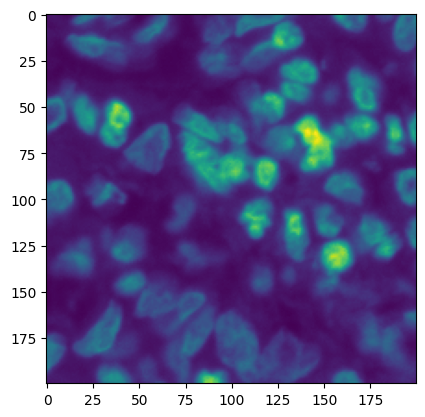

In [9]:
im_small = im[1000:1200,1000:1200]

plt.imshow(im_small)

In [38]:
model = models.CellposeModel(gpu=False, model_type='cyto')

In [39]:
mask,_,_ = model.eval(im_small)

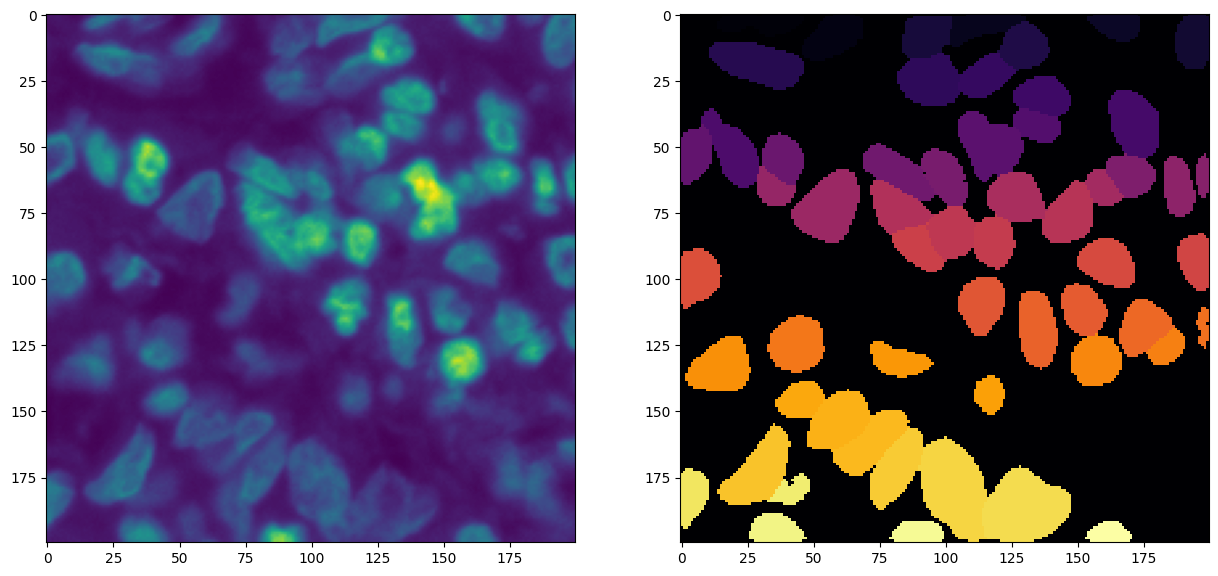

In [40]:
fig,axes = plt.subplots(1,2,figsize=(15,10))

axes[0].imshow(im_small)
axes[1].imshow(mask,cmap='inferno',interpolation='nearest')

In [24]:
model = models.CellposeModel(gpu=False, model_type='nuclei')

In [14]:
mask,_,_ = model.eval(im_small)

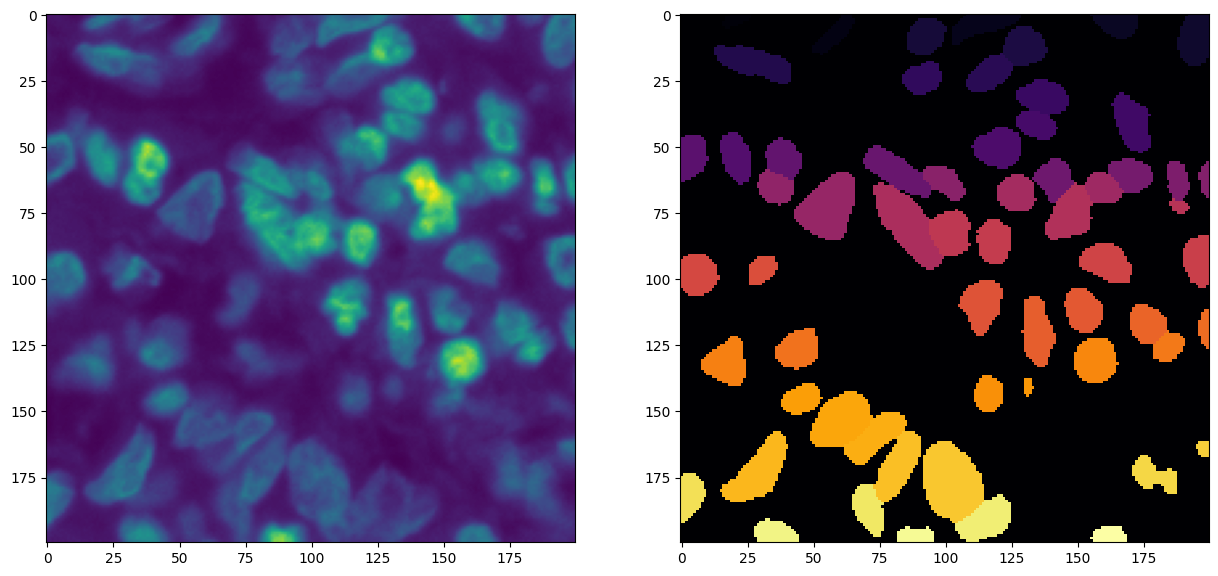

In [22]:
fig,axes = plt.subplots(1,2,figsize=(15,10))

axes[0].imshow(im_small)
axes[1].imshow(mask,cmap='inferno',interpolation='nearest')

In [29]:
#['cyto','nuclei','tissuenet','livecell','cyto2','CP','CPx','TN1','TN2','TN3','LC1']

model = models.CellposeModel(gpu=False, model_type='CPx')

100%|██████████| 25.3M/25.3M [00:00<00:00, 73.7MB/s]


In [32]:
mask,_,_ = model.eval(im_small,diameter=20)

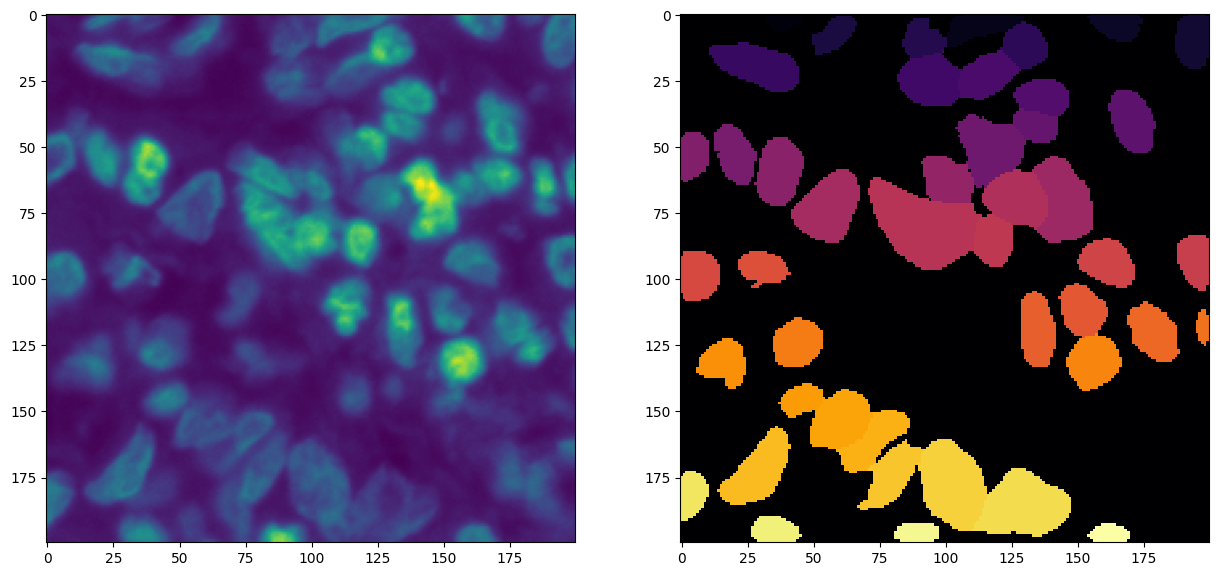

In [33]:
fig,axes = plt.subplots(1,2,figsize=(15,10))

axes[0].imshow(im_small)
axes[1].imshow(mask,cmap='inferno',interpolation='nearest')

In [34]:
model = models.CellposeModel(gpu=False, model_type='cyto2')

100%|██████████| 25.3M/25.3M [00:00<00:00, 56.3MB/s]


In [35]:
mask,_,_ = model.eval(im_small,diameter=20)

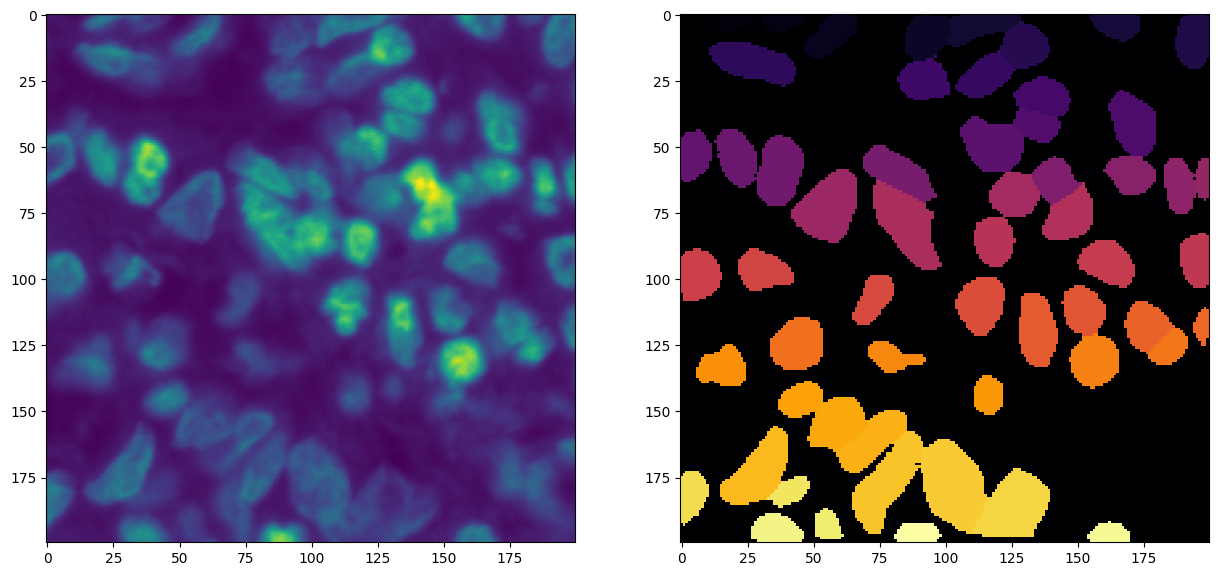

In [36]:
fig,axes = plt.subplots(1,2,figsize=(15,10))

axes[0].imshow(im_small)
axes[1].imshow(mask,cmap='inferno',interpolation='nearest')

In [43]:
imsave('./Pitt_SBII_2023/mask.tif',mask)

<ipython-input-43-d0b4eb1fd439>:1: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  imsave('./Pitt_SBII_2023/mask.tif',mask)
